# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | likasi
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | fedorovka
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | batang
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | tikrit
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | yung shue wan
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | copiapo
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | nadi
Processing Record 21 of Set 1 | brookings
Processing Record 22 of Set 1 | dolinsk
Processing Record 23 o

Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | masterton
Processing Record 44 of Set 4 | belyy yar
Processing Record 45 of Set 4 | arroyo
Processing Record 46 of Set 4 | scone
Processing Record 47 of Set 4 | mendi
Processing Record 48 of Set 4 | atafu village
Processing Record 49 of Set 4 | el calafate
Processing Record 0 of Set 5 | san andres
Processing Record 1 of Set 5 | nyagan
Processing Record 2 of Set 5 | port mathurin
Processing Record 3 of Set 5 | inhambane
Processing Record 4 of Set 5 | hammerfest
Processing Record 5 of Set 5 | idritsa
Processing Record 6 of Set 5 | kristiansund
Processing Record 7 of Set 5 | inekar
City not found. Skipping...
Processing Record 8 of Set 5 | klyuchi
Processing Record 9 of Set 5 | santa maria
Processing Record 10 of Set 5 | neuhaus
Processing Record 11 of Set 5 | shubarshi
Processing Record 12 of Set 5 | portland
Processing Record 13 of Set 5 | egilsstadir
Processing Record 14 of Set 5 | rio grande
Processing Record 15 

Processing Record 29 of Set 8 | kayangel
Processing Record 30 of Set 8 | hollidaysburg
Processing Record 31 of Set 8 | mariehamn
Processing Record 32 of Set 8 | myeik
Processing Record 33 of Set 8 | gambiran satu
Processing Record 34 of Set 8 | i-n-salah
Processing Record 35 of Set 8 | praya
Processing Record 36 of Set 8 | pacific grove
Processing Record 37 of Set 8 | camacupa
Processing Record 38 of Set 8 | tionk essil
Processing Record 39 of Set 8 | burlington
Processing Record 40 of Set 8 | tomelilla
Processing Record 41 of Set 8 | laguna
Processing Record 42 of Set 8 | tobi village
City not found. Skipping...
Processing Record 43 of Set 8 | chui
Processing Record 44 of Set 8 | tambopata
Processing Record 45 of Set 8 | mata-utu
Processing Record 46 of Set 8 | villa gesell
Processing Record 47 of Set 8 | yuncheng
Processing Record 48 of Set 8 | klaksvik
Processing Record 49 of Set 8 | la'ie
Processing Record 0 of Set 9 | at taraf
Processing Record 1 of Set 9 | laminusa
Processing Rec

Processing Record 20 of Set 12 | wytheville
Processing Record 21 of Set 12 | ancud
Processing Record 22 of Set 12 | halden
Processing Record 23 of Set 12 | dame-marie
Processing Record 24 of Set 12 | la gaude
Processing Record 25 of Set 12 | hanceville
Processing Record 26 of Set 12 | sur
Processing Record 27 of Set 12 | mpulungu
Processing Record 28 of Set 12 | al hazm
Processing Record 29 of Set 12 | kupang
Processing Record 30 of Set 12 | ondjiva
Processing Record 31 of Set 12 | masjed soleyman
Processing Record 32 of Set 12 | kaa-khem
Processing Record 33 of Set 12 | bamboo flat
Processing Record 34 of Set 12 | maloye ganyushkino
Processing Record 35 of Set 12 | meadow lake
Processing Record 36 of Set 12 | palopo
Processing Record 37 of Set 12 | mount gambier
Processing Record 38 of Set 12 | realeza
Processing Record 39 of Set 12 | itoman
Processing Record 40 of Set 12 | kavaratti
Processing Record 41 of Set 12 | tynda
-----------------------------
Data Retrieval Complete      
---

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,79.65,69,75,14.97,US,1686601632
1,whitehorse,60.7161,-135.0538,60.10,22,40,10.36,CA,1686601617
2,ushuaia,-54.8000,-68.3000,42.42,75,20,36.82,AR,1686601633
3,adamstown,-25.0660,-130.1015,68.23,64,14,6.67,PN,1686601862
4,likasi,-10.9814,26.7333,65.46,46,100,1.25,CD,1686601634


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv('../output_data/cities.csv', index_label='City_ID')

In [12]:
# Read saved data
city_data_df = pd.read_csv('../output_data/cities.csv', index_col='City_ID')

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,79.65,69,75,14.97,US,1686601632
1,whitehorse,60.7161,-135.0538,60.10,22,40,10.36,CA,1686601617
2,ushuaia,-54.8000,-68.3000,42.42,75,20,36.82,AR,1686601633
3,adamstown,-25.0660,-130.1015,68.23,64,14,6.67,PN,1686601862
4,likasi,-10.9814,26.7333,65.46,46,100,1.25,CD,1686601634


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

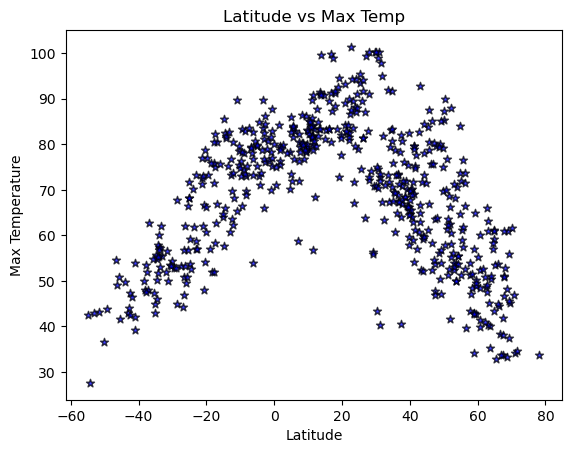

In [16]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.scatter(x_axis, y_axis, marker='*', facecolors='blue', edgecolors='black', alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

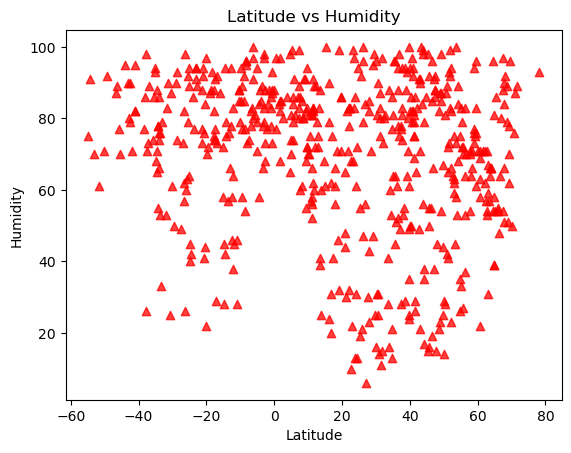

In [18]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.scatter(x_axis, y_axis, marker='^', facecolors='red', edgecolors='red', alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

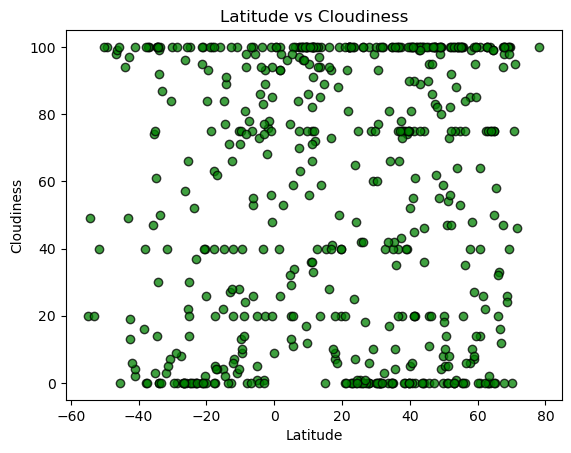

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

/var/folders/bq/6vtmnysj2px8_rr_9c85m31r0000gn/T/ipykernel_11298/1228833496.py:7: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_axis, y_axis, marker='+', facecolors='gray', edgecolors='black', alpha=0.75)


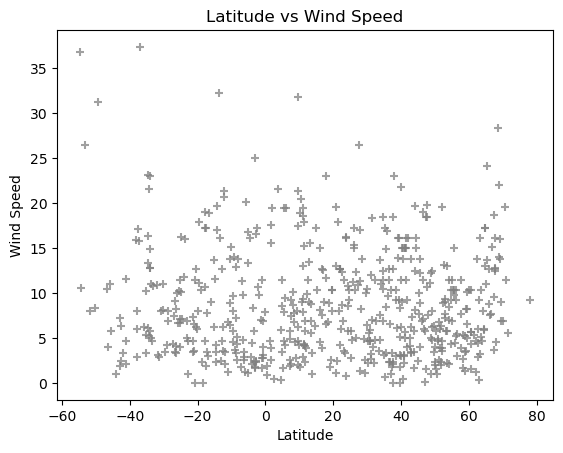

In [21]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.scatter(x_axis, y_axis, marker='+', facecolors='gray', edgecolors='black', alpha=0.75)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Equation
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate y values from slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    # Plot and Format
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f'The r-squared is: {round(r_value**2,3)}')
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,79.65,69,75,14.97,US,1686601632
1,whitehorse,60.7161,-135.0538,60.10,22,40,10.36,CA,1686601617
5,hamilton,39.1834,-84.5333,70.09,64,40,16.11,US,1686601765
6,fedorovka,53.6314,62.7078,53.78,58,100,5.82,KZ,1686601634
9,talnakh,69.4865,88.3972,45.21,96,100,6.85,RU,1686601636


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,42.42,75,20,36.82,AR,1686601633
3,adamstown,-25.0660,-130.1015,68.23,64,14,6.67,PN,1686601862
4,likasi,-10.9814,26.7333,65.46,46,100,1.25,CD,1686601634
7,margaret river,-33.9500,115.0667,60.12,66,92,14.90,AU,1686601866
8,batang,-6.4846,110.7083,78.04,83,75,4.79,ID,1686601635


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.518


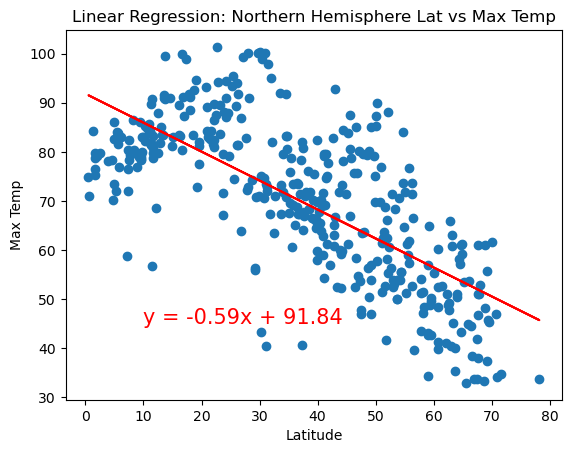

In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression(x_values, y_values, 'Linear Regression: Northern Hemisphere Lat vs Max Temp', 'Max Temp',(10,45))
plt.show()

The r-squared is: 0.72


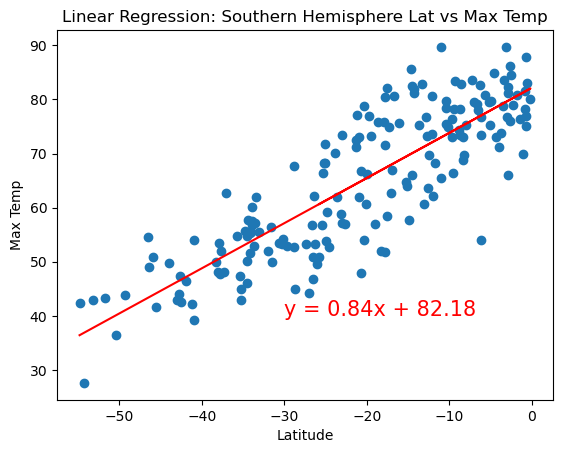

In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression(x_values, y_values, 'Linear Regression: Southern Hemisphere Lat vs Max Temp', 'Max Temp',(-30,40))
plt.show()

**Discussion about the linear relationship:** Essentially there is an inverse relationship between the latitue and temperature between the hemispheres from a linear regression point of view. The temperature goes down in either hemisphere the farther away from the equator the country is.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.006


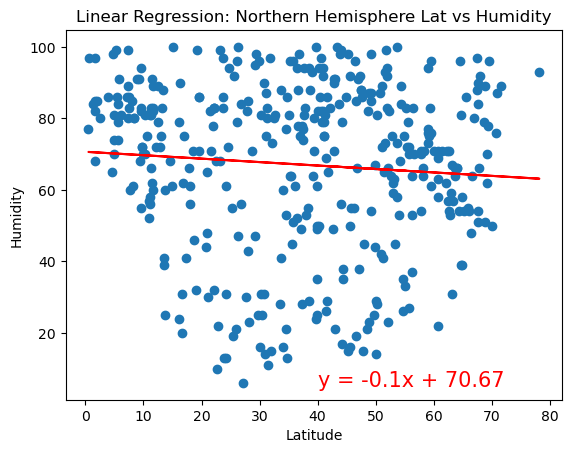

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression(x_values, y_values, 'Linear Regression: Northern Hemisphere Lat vs Humidity', 'Humidity',(40,5))
plt.show()

The r-squared is: 0.005


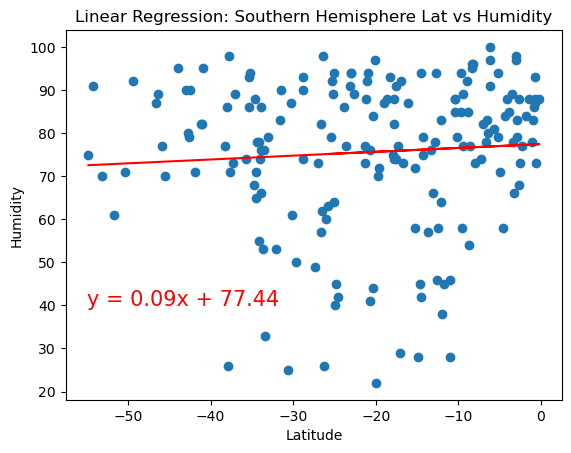

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression(x_values, y_values, 'Linear Regression: Southern Hemisphere Lat vs Humidity', 'Humidity',(-55,40))
plt.show()

**Discussion about the linear relationship:** This is the same premise as the temperature as humidity is closely linked to temperature and moisture in the air. There is a correlation that in general, the humidity will go up the closer to the equator the country is in either hemisphere. The one caviot as to why it is very minimal, is most countries around the equator are land locked and by default, tend to be dryer climates

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.006


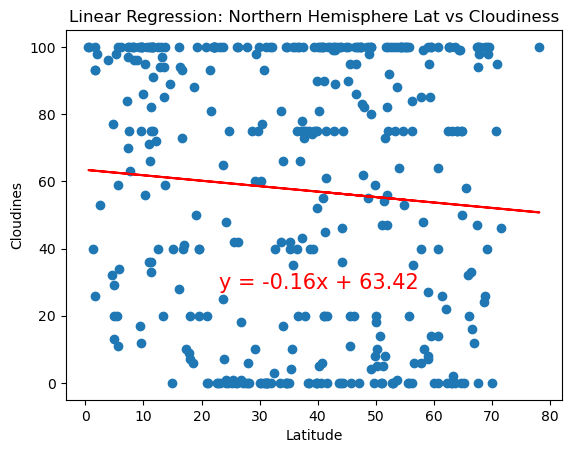

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, 'Linear Regression: Northern Hemisphere Lat vs Cloudiness', 'Cloudines',(23,28))
plt.show()

The r-squared is: 0.0


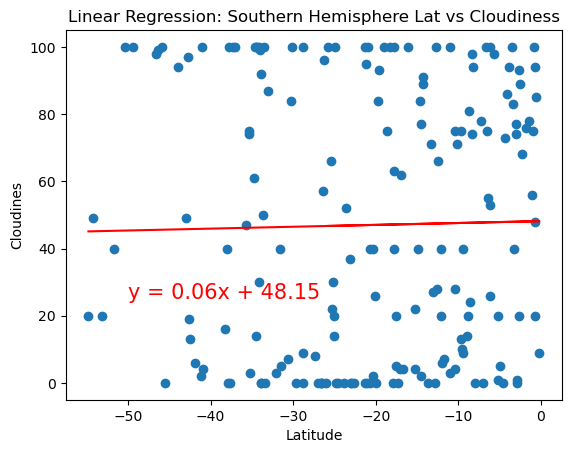

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, 'Linear Regression: Southern Hemisphere Lat vs Cloudiness', 'Cloudines',(-50,25))
plt.show()

**Discussion about the linear relationship:** This is the same as the humidity as clouds form when the invisible water vapor in the air condenses into visible water droplets or ice crystals, ergo, there is a slight correlation that would be stronger if more countries around the equator were not land locked

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0


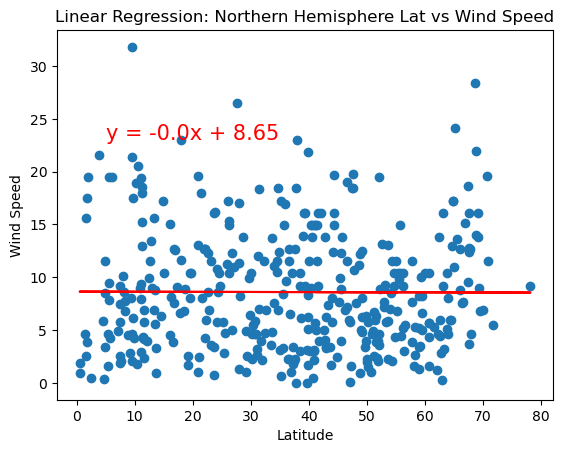

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, 'Linear Regression: Northern Hemisphere Lat vs Wind Speed', 'Wind Speed',(5,23))
plt.show()

The r-squared is: 0.035


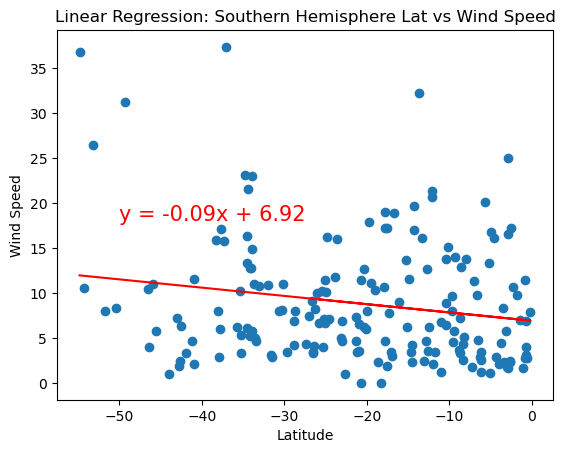

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, 'Linear Regression: Southern Hemisphere Lat vs Wind Speed', 'Wind Speed',(-50,18))
plt.show()

**Discussion about the linear relationship:** Sine wind energy is actually a byproduct of the sun. The sun's uneven heating of the atmosphere, the earth's irregular surfaces (mountains and valleys), and the planet's revolution around the sun all combine to create wind. So there is latitude has zero bearing on what the wind speed will be because wind speed is not generated by surface or air temperature which is the primary correlation between the latitude and equator in both hemispheres